In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Mehakdeep Singh\AppData\Local\Temp\ipykernel_19692\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10240,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939151e+07,1.939151e+07,False,NaN,1,NaN,NaN,None,2023-06-03T04:20:00.000Z,27140.232406,1.315642e+10,-6.2156,-0.143644,0.618090,1.483958,-6.761473,-2.608761,20.859420,5.262901e+11,45.9555,5.699449e+11,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
1,1027,Ethereum,ETH,ethereum,6964,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202367e+08,1.202367e+08,True,NaN,2,NaN,NaN,None,2023-06-03T04:20:00.000Z,1899.531241,5.585167e+09,7.9733,-0.126934,1.188681,3.673139,-0.267564,5.104228,20.959212,2.283934e+11,19.9432,2.283934e+11,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
2,825,Tether,USDT,tether,54987,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.315249e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-03T04:20:00.000Z,1.000386,1.917330e+10,-2.2980,0.000320,0.010799,0.002403,0.000720,0.034242,0.030674,8.318456e+10,7.2636,8.612384e+10,None,2023-06-03T04:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-03 04:22:37.464252
3,1839,BNB,BNB,bnb,1443,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558561e+08,1.558561e+08,False,NaN,4,NaN,NaN,None,2023-06-03T04:20:00.000Z,305.771042,3.608350e+08,7.7353,-0.250861,-0.349612,-0.459935,-6.384449,-1.267009,5.010212,4.765630e+10,4.1616,4.765630e+10,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
4,3408,USD Coin,USDC,usd-coin,12796,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.891114e+10,2.891114e+10,False,NaN,5,NaN,NaN,None,2023-06-03T04:20:00.000Z,1.000012,2.733708e+09,-0.0875,-0.000743,-0.009229,-0.008967,-0.003027,0.033167,-0.010835,2.891148e+10,2.5245,2.891148e+10,None,2023-06-03T04:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-03 04:22:37.464252
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-03T04:20:00.000Z,0.524734,9.506304e+08,-6.5946,0.253302,1.477238,11.514677,13.133610,5.785967,40.015470,2.727937e+10,2.3820,5.247342e+10,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
6,2010,Cardano,ADA,cardano,816,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.488873e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-03T04:20:00.000Z,0.376910,1.767054e+08,-20.9636,0.075475,1.547904,3.230449,-3.805285,-4.027365,10.652847,1.314991e+10,1.1482,1.696095e+10,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.396089e+11,1.396089e+11,True,NaN,8,NaN,NaN,None,2023-06-03T04:20:00.000Z,0.072443,1.610504e+08,4.1233,0.071199,0.780996,1.157718,-8.850784,-24.552487,-4.212046,1.011371e+10,0.8832,1.011371e+10,None,2023-06-03T04:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:22:37.464252
8,5426,Solana,SOL,solana,468,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.969701e+08,5.49

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\Mehakdeep Singh\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\Mehakdeep Singh\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Mehakdeep Singh\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        


In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\Mehakdeep Singh\AppData\Local\Temp\ipykernel_19692\3541531537.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Mehakdeep Singh\AppData\Local\Temp\ipykernel_19692\3541531537.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Mehakdeep Singh\AppData\Local\Temp\ipykernel_19692\3541531537.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [10]:
df72 = pd.read_csv(r'C:\Users\Mehakdeep Singh\OneDrive\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10240,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19390843.00000,19390843.00000,False,NaN,1,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,27112.77294,15081291005.07806,2.31290,0.12680,0.80067,2.26587,-4.37064,-3.71481,21.15516,525739523388.74402,45.95530,569368231755.76001,NaN,2023-06-02T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:37:31.339603
1,1,1027,Ethereum,ETH,ethereum,6963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120242777.04409,120242777.04409,True,NaN,2,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,1892.43672,6087592990.63706,8.20910,0.06789,1.64099,3.85578,1.90352,4.77472,20.54573,227551846873.28079,19.89590,227551846873.28000,NaN,2023-06-02T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:37:31.339603
2,2,825,Tether,USDT,tether,54962,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83249690591.49167,86090638895.02817,True,NaN,3,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,1.00026,20979599584.45904,-6.97800,-0.00484,-0.02335,0.01179,-0.01681,0.01227,0.01483,83271357826.29753,7.28080,86113045537.92000,NaN,2023-06-02T13:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 13:37:31.339603
3,3,1839,BNB,BNB,bnb,1441,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155856253.79812,155856253.79812,False,NaN,4,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,306.79233,380305007.63153,-2.89670,0.04472,0.60171,0.10102,-4.98584,-1.83723,5.40095,47815502725.00377,4.17710,47815502725.00000,NaN,2023-06-02T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:37:31.339603
4,4,3408,USD Coin,USDC,usd-coin,12788,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28963681021.70996,28963681021.70996,False,NaN,5,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,0.99998,2957345666.77456,-0.56120,0.00559,-0.03134,0.00541,-0.01178,0.02124,-0.00565,28963092527.96449,2.53090,28963092527.96000,NaN,2023-06-02T13:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 13:37:31.339603
5,5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51983386003.00000,99988920499.00000,False,NaN,6,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,0.51566,990413349.19345,-20.84770,0.37525,2.01257,10.75557,13.68467,0.42616,37.24674,26805665600.27320,2.34240,51565832204.02000,NaN,2023-06-02T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:37:31.339603
6,6,2010,Cardano,ADA,cardano,813,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34886092231.17100,35842779602.84000,False,NaN,7,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,0.37631,216311027.88717,-8.85790,0.37572,3.25602,4.97711,-1.41623,-4.73705,10.12059,13127883443.94358,1.14680,16933818527.53000,NaN,2023-06-02T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 13:37:31.339603
7,7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139599736383.70520,139599736383.70520,True,NaN,8,NaN,NaN,NaN,2023-06-02T13:36:00.000Z,0.07199,159253715.84872,-2.90690,0.12988,0.39745,1.48812,-7.63356,-7.69034,-5.70285,10049657929.95741,0.87790,10049657929.96000,NaN,2023-06-02T13:36:00.000Z,NaN,N

In [ ]:
df

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f'% x)

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10240,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19391512.00000,19391512.00000,False,NaN,1,NaN,NaN,None,2023-06-03T04:23:00.000Z,27143.52599,13153560225.17080,-6.22870,-0.07877,0.58644,1.48882,-6.77708,-2.63229,20.86766,526354009875.08258,45.95700,570014045700.85999,None,2023-06-03T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:24:39.642197
1,1027,Ethereum,ETH,ethereum,6964,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120236711.59771,120236711.59771,True,NaN,2,NaN,NaN,None,2023-06-03T04:23:00.000Z,1899.78094,5580584421.45332,7.66000,-0.06642,1.10792,3.65845,-0.28439,5.08629,20.98308,228423412725.41473,19.94330,228423412725.41000,None,2023-06-03T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:24:39.642197
2,825,Tether,USDT,tether,54987,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83152494318.89395,86090638895.02290,True,NaN,3,NaN,NaN,None,2023-06-03T04:23:00.000Z,1.00032,19154466702.22770,-2.42400,-0.01359,0.01472,-0.00051,-0.01977,0.01706,0.02385,83179123681.19119,7.26220,86118209190.21001,None,2023-06-03T04:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-03 04:24:39.642197
3,1839,BNB,BNB,bnb,1443,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155856148.44098,155856148.44098,False,NaN,4,NaN,NaN,None,2023-06-03T04:23:00.000Z,305.82042,361157960.33723,7.41700,-0.24048,-0.29183,-0.47260,-6.36456,-1.25115,5.07586,47663992716.68649,4.16160,47663992716.69000,None,2023-06-03T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:24:39.642197
4,3408,USD Coin,USDC,usd-coin,12796,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28911140164.81301,28911140164.81301,False,NaN,5,NaN,NaN,None,2023-06-03T04:23:00.000Z,1.00001,2731689491.28544,-0.16190,-0.00289,0.00364,-0.00672,-0.02047,0.01841,-0.01430,28911561404.94978,2.52450,28911561404.95000,None,2023-06-03T04:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-03 04:24:39.642197
5,52,XRP,XRP,xrp,959,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-03T04:23:00.000Z,0.52509,950334564.63232,-6.64880,0.38067,1.59410,11.64376,13.20952,5.77455,40.06917,27297839673.25845,2.38360,52508955019.25000,None,2023-06-03T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:24:39.642197
6,2010,Cardano,ADA,cardano,816,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34888732995.85000,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-03T04:23:00.000Z,0.37703,176870145.04325,-20.82010,0.11860,1.57582,3.25595,-3.78978,-3.81890,10.75699,13154106176.94414,1.14850,16966359255.09000,None,2023-06-03T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-03 04:24:39.642197
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139608926383.70523,139608926383.70523,True,NaN,8,NaN,NaN,None,2023-06-03T04:23:00.000Z,0.07247,160851872.67525,4.01430,0.11743,0.81332,1.13706,-8.80829,-24.53580,-4.18110,10117065333.69558,0.88330,10117065333.70000,None,2023-06-03T04:23:00.000Z,NaN,NaN,N

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07877,0.58644,1.48882,-6.77708,-2.63229,20.86766
Ethereum,-0.06642,1.10792,3.65845,-0.28439,5.08629,20.98308
Tether,-0.01359,0.01472,-0.00051,-0.01977,0.01706,0.02385
BNB,-0.24048,-0.29183,-0.47260,-6.36456,-1.25115,5.07586
USD Coin,-0.00289,0.00364,-0.00672,-0.02047,0.01841,-0.01430
XRP,0.38067,1.59410,11.64376,13.20952,5.77455,40.06917
Cardano,0.11860,1.57582,3.25595,-3.78978,-3.81890,10.75699
Dogecoin,0.11743,0.81332,1.13706,-8.80829,-24.53580,-4.18110
Solana,-0.04953,1.87425,8.52503,-5.08178,3.62770,-1.09654


In [17]:
df4 =df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.07877
             quote.USD.percent_change_24h     0.58644
             quote.USD.percent_change_7d      1.48882
             quote.USD.percent_change_30d    -6.77708
             quote.USD.percent_change_60d    -2.63229
             quote.USD.percent_change_90d    20.86766
Ethereum     quote.USD.percent_change_1h     -0.06642
             quote.USD.percent_change_24h     1.10792
             quote.USD.percent_change_7d      3.65845
             quote.USD.percent_change_30d    -0.28439
             quote.USD.percent_change_60d     5.08629
             quote.USD.percent_change_90d    20.98308
Tether       quote.USD.percent_change_1h     -0.01359
             quote.USD.percent_change_24h     0.01472
             quote.USD.percent_change_7d     -0.00051
             quote.USD.percent_change_30d    -0.01977
             quote.USD.percent_change_60d     0.01706
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.07877
            quote.USD.percent_change_24h   0.58644
            quote.USD.percent_change_7d    1.48882
            quote.USD.percent_change_30d  -6.77708
            quote.USD.percent_change_60d  -2.63229
            quote.USD.percent_change_90d  20.86766
Ethereum    quote.USD.percent_change_1h   -0.06642
            quote.USD.percent_change_24h   1.10792
            quote.USD.percent_change_7d    3.65845
            quote.USD.percent_change_30d  -0.28439
            quote.USD.percent_change_60d   5.08629
            quote.USD.percent_change_90d  20.98308
Tether      quote.USD.percent_change_1h   -0.01359
            quote.USD.percent_change_24h   0.01472
            quote.USD.percent_change_7d   -0.00051
            quote.USD.percent_change_30d  -0.01977
            quote.USD.percent_change_60d   0.01706
            quote.USD.percent_change_90d   0.02385
BNB         quote.USD.percent_change_1h   -0.24048
            quote.USD.percent_change_24h  -0.29183
            quote.USD.percent_change_7d   -0.47260
            quote.USD.percent_change_30d  -6.36456
            quote.USD.percent_change_60d  -1.25115
            quote.USD.percent_change_90d   5.07586
USD Coin    quote.USD.percent_change_1h   -0.00289
            quote.USD.percent_change_24h   0.00364
            quote.USD.percent_change_7d   -0.00672
            quote.USD.percent_change_30d  -0.02047
            quote.USD.percent_change_60d   0.01841
            quote.USD.percent_change_90d  -0.01430
XRP         quote.USD.percent_change_1h    0.38067
            quote.USD.percent_change_24h   1.59410
            quote.USD.percent_change_7d   11.64376
            quote.USD.percent_change_30d  13.20952
            quote.USD.percent_change_60d   5.77455
            quote.USD.percent_change_90d  40.06917
Cardano     quote.USD.percent_change_1h    0.11860
            quote.USD.percent_change_24h   1.57582
            quote.USD.percent_change_7d    3.25595
            quote.USD.percent_change_30d  -3.78978
            quote.USD.percent_change_60d  -3.81890
            quote.USD.percent_change_90d  10.75699
Dogecoin    quote.USD.percent_change_1h    0.11743
            quote.USD.percent_change_24h   0.81332
            quote.USD.percent_change_7d    1.13706
            quote.USD.percent_change_30d  -8.80829
            quote.USD.percent_change_60d -24.53580
            quote.USD.percent_change_90d  -4.18110
Solana      quote.USD.percent_change_1h   -0.04953
            quote.USD.percent_change_24h   1.87425
            quote.USD.percent_change_7d    8.52503
            quote.USD.percent_change_30d  -5.08178
            quote.USD.percent_change_60d   3.62770
            quote.USD.percent_change_90d  -1.09654
Polygon     quote.USD.percent_change_1h    0.02120
            quote.USD.percent_change_24h  -0.10004
            quote.USD.percent_change_7d   -1.93710
            quote.USD.percent_change_30d -10.22190
            quote.USD.percent_change_60d -18.26086
            quote.USD.percent_change_90d -21.80942
TRON        quote.USD.percent_change_1h   -0.76237
            quote.USD.percent_change_24h  10.40818
            quote.USD.percent_change_7d   10.53245
            quote.USD.percent_change_30d  20.26485
            quote.USD.percent_change_60d  25.82384
            quote.USD.percent_change_90d  23.99286
Litecoin    quote.USD.percent_change_1h    0.12903
            quote.USD.percent_change_24h  -0.29212
            quote.USD.percent_change_7d    7.92510
            quote.USD.percent_change_30d   6.85514
            quote.USD.percent_change_60d   2.68549
            quote.USD.percent_change_90d   3.89824
Polkadot    quote.USD.percent_change_1h   -0.00978
            quote.USD.percent_change_24h   0.24860
            quote.USD.percent_change_7d   -0.17782
            quote.USD.percent_change_30d  -9.03591
            quote.USD.percent_change_60d -18.04496
            quo

In [22]:
df5.count()

values    90
dtype: int64

In [26]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07877
1,Bitcoin,quote.USD.percent_change_24h,0.58644
2,Bitcoin,quote.USD.percent_change_7d,1.48882
3,Bitcoin,quote.USD.percent_change_30d,-6.77708
4,Bitcoin,quote.USD.percent_change_60d,-2.63229
5,Bitcoin,quote.USD.percent_change_90d,20.86766
6,Ethereum,quote.USD.percent_change_1h,-0.06642
7,Ethereum,quote.USD.percent_change_24h,1.10792
8,Ethereum,quote.USD.percent_change_7d,3.65845
9,Ethereum,quote.USD.percent_change_30d,-0.28439


In [27]:
df7 = df6.rename(columns= {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.07877
1,Bitcoin,quote.USD.percent_change_24h,0.58644
2,Bitcoin,quote.USD.percent_change_7d,1.48882
3,Bitcoin,quote.USD.percent_change_30d,-6.77708
4,Bitcoin,quote.USD.percent_change_60d,-2.63229
5,Bitcoin,quote.USD.percent_change_90d,20.86766
6,Ethereum,quote.USD.percent_change_1h,-0.06642
7,Ethereum,quote.USD.percent_change_24h,1.10792
8,Ethereum,quote.USD.percent_change_7d,3.65845
9,Ethereum,quote.USD.percent_change_30d,-0.28439


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.07877
1,Bitcoin,24h,0.58644
2,Bitcoin,7d,1.48882
3,Bitcoin,30d,-6.77708
4,Bitcoin,60d,-2.63229
5,Bitcoin,90d,20.86766
6,Ethereum,1h,-0.06642
7,Ethereum,24h,1.10792
8,Ethereum,7d,3.65845
9,Ethereum,30d,-0.28439


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


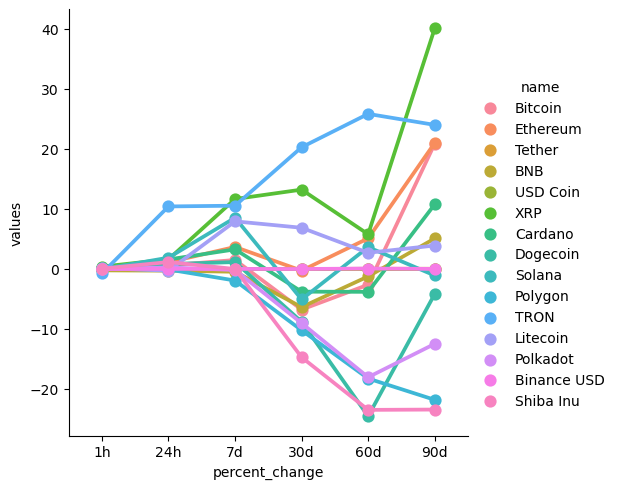

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

KeyError: "['timestamp'] not in index"

In [49]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

NameError: name 'df10' is not defined